In [118]:
36*300

10800

In [119]:
import sys
print(sys.path)
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code')
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/')
from latentNoise_funcs_gen import *
from ANLSMN_genfuncs import *
from processResults import *
%load_ext autoreload
%autoreload 2


['/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/notebooks', './ITE-1.1_code', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code', '/home/emiliano/anaconda3/lib/python37.zip', '/home/emiliano/anaconda3/lib/python3.7', '/home/emiliano/anaconda3/lib/python3.7/lib-dynload', '', '/home/emiliano/anaconda3/lib/python3.7/site-packages', '/home/emiliano/anaconda3/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg', '/home/emiliano/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/emiliano/.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import jax.numpy as np
import numpy as onp 
import pandas as pd
import pickle5 as pickle5
import pickle 
import time
import json
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
import itertools
from scipy.spatial import distance
from itertools import chain, combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

#from fairlearn.reductions import ExponentiatedGradient, DemographicParity 
from sklearn.tree import DecisionTreeClassifier
#from fairlearn.metrics import MetricFrame, selection_rate, count
import sklearn.metrics as skm

from sklearn.utils import check_random_state



In [121]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/post/accs/"

In [122]:
file = "2_tabAcc_initStrat:freeZ-iniMani_freeZ_freeZ-iniR*byParm:m_1*lowestHsic:var_hsic-sig_0.1.pkl"
file = "1_tabAcc_initStrat:freeZ-iniMani_freeZ_freeZ-iniR*byParm:m_1*uniform:.pkl"


#import pickle5 as pickle
res = pickle5.load( open( repos+file, "rb" ) )
res

FileNotFoundError: [Errno 2] No such file or directory: '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/post/accs/1_tabAcc_initStrat:freeZ-iniMani_freeZ_freeZ-iniR*byParm:m_1*uniform:.pkl'

In [123]:
[len(res[k]) for k in res.keys()]

[224, 224, 224, 224, 224]

In [124]:
import os
files = os.listdir(repos)

In [125]:
print("num files: ", len(files))
files[0]

num files:  114


"99_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_2*modSimp_RF:var_smpl_nm_smpld.pkl"

In [126]:
pairUpNm = ["NN"]
weightNm = ["lowestHsic"]

initStrats = [["freeZ"]]

parsPairUp = [{"varsss": [["hsicx", "hsicc", "errs"]], "numPts": [1,2,5,10,15,20]}]

var_smpl_nm = "smpld"
parsWeight = [{"var": ["hsicx"], "sig": [1, 5, 10]}]

pairUpNm = ["byParm", "rand", "intsc", "NN"]
weightNm = ["uniform", "lowestHsic", "effFront", "modSimp_logis", "modSimp_RF"]

initStrats = [["freeZ"]]

parsPairUp = [{"m": [1]}, {"m": [1000, 10000]},
                  {"varsss": [["hsicx", "hsicc", "errs"]], "sig": [1, 100.0, 1000.0], "m": [100, 1000]},
                  {"varsss": [["hsicx", "hsicc", "errs"]], "numPts": [1, 2, 5, 10, 15, 20]}]

var_smpl_nm = ["smpld"]
parsWeight = [{}, {"var": ["hsicx"], "sig": [1, 5, 10]},
                  {"varsss": [["hsicx", "hsicc"]], "sig": [1, 5, 10]},
                  {"var_smpl_nm": var_smpl_nm},
                  {"var_smpl_nm": var_smpl_nm}]


In [127]:
9*15

135

In [128]:
initStrat_pairUp_df, initStrat_pairUp_weight_df = getPipelineDF(initStrats, parsPairUp, parsWeight, pairUpNm=pairUpNm, weightNm=weightNm)

PairUp
[[{'m': 1}], [{'m': 1000}, {'m': 10000}], [{'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 1, 'm': 100}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 1, 'm': 1000}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 100.0, 'm': 100}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 100.0, 'm': 1000}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 1000.0, 'm': 100}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'sig': 1000.0, 'm': 1000}], [{'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 1}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 2}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 5}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 10}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 15}, {'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts': 20}]]
Weight
[[{}], [{'var': 'hsicx', 'sig': 1}, {'var': 'hsicx', 'sig': 5}, {'var': 'hsicx', 'sig': 10}], [{'varsss': ['hsicx', 'hsicc'], 'sig': 1}, {'varsss': ['hsicx', 'hsicc'], 'sig': 5}, {'varsss': ['hsicx', 'hsicc'], 'sig': 10}], [{'var_smpl_nm'

In [129]:
print("initStrat_pairUp_df.shape", initStrat_pairUp_df.shape)
print("initStrat_pairUp_weight_df.shape", initStrat_pairUp_weight_df.shape)

initStrat_pairUp_df.shape (15, 8)
initStrat_pairUp_weight_df.shape (135, 20)


In [130]:
initStrat_pairUp_weight_df.iloc[7]

initStrat                                                      [freeZ]
initStrat_id                                                     freeZ
pairUpNm                                                        byParm
pairUpFunct                      <function smplParm at 0x7fdc0382b710>
pairUpParsFunct               <function getParsParm at 0x7fdc0382b7a0>
parsPairUp                                                    {'m': 1}
parsPairUp_id                                                      m_1
df_id                                       initStrat:freeZ*byParm:m_1
weightNm                                                 modSimp_logis
weightModMatFunct            <function getModMatVan at 0x7fdc0382bcb0>
weightModMatPars                                                  None
weightModFunct                  <function getModVan at 0x7fdc0382bd40>
weightModPars                                                     None
weightVar                                                       w_unif
weight

In [131]:
initStrat_pairUp_weight_df["job"] = onp.arange(initStrat_pairUp_weight_df.shape[0])+1
initStrat_pairUp_weight_df["file"] = [str(j)+"_tabAcc_"+a+".pkl" for j,a in zip(initStrat_pairUp_weight_df["job"], initStrat_pairUp_weight_df["acc_id"])]

In [132]:
initStrat_pairUp_weight_df["file"] = [str(j)+"_tabAcc_"+a+".pkl" for j,a in zip(initStrat_pairUp_weight_df["job"], initStrat_pairUp_weight_df["acc_id"])]

In [133]:
# files in directory but not in pipeline table - there should be none
indxNot = [not f in initStrat_pairUp_weight_df["file"].to_list() for f in files]
indxNot, = onp.where(indxNot)
[files[i] for i in indxNot]

[]

In [134]:
indxNot = [not f in files for f in initStrat_pairUp_weight_df["file"].to_list()]
indxNot, = onp.where(indxNot)
print("num not in dir: ", len(indxNot))
print("num not in dir: ", initStrat_pairUp_weight_df.shape[0]-len(files))


num not in dir:  21
num not in dir:  21


In [135]:
initStrat_pairUp_weight_df.loc[initStrat_pairUp_weight_df["job"]==87]

,initStrat,initStrat_id,pairUpNm,pairUpFunct,pairUpParsFunct,parsPairUp,parsPairUp_id,df_id,weightNm,weightModMatFunct,...,weightModPars,weightVar,weightFunct,weightParsFunct,weightParsTup,parsWeight,parsWeight_id,acc_id,job,file
86,[freeZ],freeZ,NN,<function smplParm at 0x7fdc0382b710>,<function getParsParm at 0x7fdc0382b7a0>,"{'varsss': ['hsicx', 'hsicc', 'errs'], 'numPts...","varsss_['hsicx', 'hsicc', 'errs']-numPts_1","initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', '...",effFront,<function getModMatVan at 0x7fdc0382bcb0>,...,None,w_unif,<function unifo at 0x7fdc0382bef0>,<function getParsUnifW at 0x7fdc0382be60>,[],"{'varsss': ['hsicx', 'hsicc'], 'sig': 5}","varsss_['hsicx', 'hsicc']-sig_5","initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', '...",87,"87_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ..."


In [136]:
initStrat_pairUp_weight_df[["pairUpNm","parsPairUp_id","job"]].iloc[indxNot].groupby(["pairUpNm","parsPairUp_id"]).count()

job
pairUpNm parsPairUp_id                                   
NN       varsss_['hsicx', 'hsicc', 'errs']-numPts_10    4
         varsss_['hsicx', 'hsicc', 'errs']-numPts_15    5
         varsss_['hsicx', 'hsicc', 'errs']-numPts_20    4
         varsss_['hsicx', 'hsicc', 'errs']-numPts_5     4
rand     m_10000                                        4

In [137]:
initStrat_pairUp_weight_df[["weightNm","parsWeight_id","job"]].iloc[indxNot].groupby(["weightNm","parsWeight_id"]).count()

job
weightNm      parsWeight_id                        
effFront      varsss_['hsicx', 'hsicc']-sig_1     5
              varsss_['hsicx', 'hsicc']-sig_10    5
              varsss_['hsicx', 'hsicc']-sig_5     5
modSimp_logis var_smpl_nm_smpld                   5
uniform                                           1

In [138]:
# files in pipeLine table but not in directory
initStrat_pairUp_weight_df[["pairUpNm","parsPairUp_id","weightNm","parsWeight_id","job"]].iloc[indxNot].groupby(["pairUpNm","parsPairUp_id","weightNm","parsWeight_id"]).count()

job
pairUpNm parsPairUp_id                               weightNm      parsWeight_id                        
NN       varsss_['hsicx', 'hsicc', 'errs']-numPts_10 effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                   varsss_['hsicx', 'hsicc']-sig_10    1
                                                                   varsss_['hsicx', 'hsicc']-sig_5     1
                                                     modSimp_logis var_smpl_nm_smpld                   1
         varsss_['hsicx', 'hsicc', 'errs']-numPts_15 effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                   varsss_['hsicx', 'hsicc']-sig_10    1
                                                                   varsss_['hsicx', 'hsicc']-sig_5     1
                                                     modSimp_logis var_smpl_nm_smpld                   1
                                                     uniform                                           1
         varsss_['hsicx', 'hsicc', 'errs']-numPts_20 effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                   varsss_['hsicx', 'hsicc']-sig_10    1
                                                                   varsss_['hsicx', 'hsicc']-sig_5     1
                                                     modSimp_logis var_smpl_nm_smpld                   1
         varsss_['hsicx', 'hsicc', 'errs']-numPts_5  effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                   varsss_['hsicx', 'hsicc']-sig_10    1
                                                                   varsss_['hsicx', 'hsicc']-sig_5     1
                                                     modSimp_logis var_smpl_nm_smpld                   1
rand     m_10000                                     effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                   varsss_['hsicx', 'hsicc']-sig_10    1
                                                                   varsss_['hsicx', 'hsicc']-sig_5     1
                                                     modSimp_logis var_smpl_nm_smpld                   1

In [139]:
# 92, 94-98, 203-206, 311-314, 416
initStrat_pairUp_weight_df["job"].loc[(initStrat_pairUp_weight_df["pairUpNm"]=="NN")&(initStrat_pairUp_weight_df["parsPairUp_id"]=="varsss_['hsic', 'hsicc', 'errs']-numPts_10")]

Series([], Name: job, dtype: int64)

In [140]:
initStrat_pairUp_weight_df[["pairUpNm","parsPairUp_id","job"]].groupby(["pairUpNm","parsPairUp_id"]).count()

job
pairUpNm parsPairUp_id                                          
NN       varsss_['hsicx', 'hsicc', 'errs']-numPts_1            9
         varsss_['hsicx', 'hsicc', 'errs']-numPts_10           9
         varsss_['hsicx', 'hsicc', 'errs']-numPts_15           9
         varsss_['hsicx', 'hsicc', 'errs']-numPts_2            9
         varsss_['hsicx', 'hsicc', 'errs']-numPts_20           9
         varsss_['hsicx', 'hsicc', 'errs']-numPts_5            9
byParm   m_1                                                   9
intsc    varsss_['hsicx', 'hsicc', 'errs']-sig_1-m_100         9
         varsss_['hsicx', 'hsicc', 'errs']-sig_1-m_1000        9
         varsss_['hsicx', 'hsicc', 'errs']-sig_100.0-m_100     9
         varsss_['hsicx', 'hsicc', 'errs']-sig_100.0-m_1000    9
         varsss_['hsicx', 'hsicc', 'errs']-sig_1000.0-m_100    9
         varsss_['hsicx', 'hsicc', 'errs']-sig_1000.0-m_...    9
rand     m_1000                                                9
         m_10000                                               9

In [141]:
initStrat_pairUp_weight_df[["weightNm","parsWeight_id","job"]].groupby(["weightNm","parsWeight_id"]).count()

job
weightNm      parsWeight_id                        
effFront      varsss_['hsicx', 'hsicc']-sig_1    15
              varsss_['hsicx', 'hsicc']-sig_10   15
              varsss_['hsicx', 'hsicc']-sig_5    15
lowestHsic    var_hsicx-sig_1                    15
              var_hsicx-sig_10                   15
              var_hsicx-sig_5                    15
modSimp_RF    var_smpl_nm_smpld                  15
modSimp_logis var_smpl_nm_smpld                  15
uniform                                          15

In [142]:
initStrat_pairUp_weight_df[["pairUpNm","parsPairUp_id","weightNm","parsWeight_id","job"]].groupby(["pairUpNm","parsPairUp_id","weightNm","parsWeight_id"]).count()

job
pairUpNm parsPairUp_id                              weightNm      parsWeight_id                        
NN       varsss_['hsicx', 'hsicc', 'errs']-numPts_1 effFront      varsss_['hsicx', 'hsicc']-sig_1     1
                                                                  varsss_['hsicx', 'hsicc']-sig_10    1
                                                                  varsss_['hsicx', 'hsicc']-sig_5     1
                                                    lowestHsic    var_hsicx-sig_1                     1
                                                                  var_hsicx-sig_10                    1
...                                                                                                 ...
rand     m_10000                                    lowestHsic    var_hsicx-sig_10                    1
                                                                  var_hsicx-sig_5                     1
                                                    modSimp_RF    var_smpl_nm_smpld                   1
                                                    modSimp_logis var_smpl_nm_smpld                   1
                                                    uniform                                           1

[135 rows x 1 columns]

In [143]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/post/accs/"

In [144]:
import pickle5 as pickle
f = files[3]

def readAcc(filename):
    res = pd.DataFrame(pickle.load( open( repos+filename, "rb" ) ))
    res["file"] = filename
    return res


In [145]:
res = [readAcc(f) for f in files]

In [146]:
res = pd.concat(res)

In [147]:
res.shape

(30780, 13)

In [148]:
res = res.loc[res["variable"]=="ent"]

In [149]:
res[["mask","value"]].groupby(["mask"]).count()

,value
mask,
None,3420
additive,3420


In [150]:
tabAcc = pd.pivot_table(res, index=["file","parPairUpNm","parWeightNm","pairUp","weight","mask"], columns=["type"], values="value", aggfunc=onp.mean)

In [151]:
tabAcc.loc[tabAcc["LS-s"]==onp.max(tabAcc["LS-s"])]

,,,,,type,AN,AN-s,LS,LS-s,MN-U,SIM,SIMG,SIMc,SIMln,tcep,tcep_Add,tcep_Disc,tcep_GEO,tcep_NONGEO,tcep_NonAdd,tcep_NonDisc,tcep_w
file,parPairUpNm,parWeightNm,pairUp,weight,mask,,,,,,,,,,,,,,,,,
"101_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_5*lowestHsic:var_hsicx-sig_1.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_5",var_hsicx-sig_1,NN,lowestHsic,None,0.964646,0.71,0.994898,1.0,1.00,0.592775,0.516234,0.584135,0.572592,0.620690,0.666667,0.637838,0.678571,0.646675,0.574713,0.65,0.620690
"102_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_5*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_5",var_hsicx-sig_5,NN,lowestHsic,None,1.000000,0.97,0.989796,1.0,1.00,0.685550,0.856331,0.740385,0.662822,0.705747,0.733333,0.664865,0.750000,0.727510,0.678161,0.82,0.705747
"120_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_15*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_15",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.000000,1.0,1.00,0.671593,0.865260,0.768429,0.625283,0.722989,0.733333,0.691892,0.767857,0.744459,0.712644,0.83,0.722989
"129_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_20*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.000000,1.0,1.00,0.674877,0.874188,0.758013,0.640434,0.722989,0.733333,0.678378,0.767857,0.744459,0.712644,0.84,0.722989
"83_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_1*lowestHsic:var_hsicx-sig_1.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_1",var_hsicx-sig_1,NN,lowestHsic,None,0.934343,0.72,0.994898,1.0,1.00,0.613300,0.482143,0.504006,0.557440,0.654023,0.733333,0.624324,0.678571,0.685137,0.574713,0.76,0.654023
"92_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_2*lowestHsic:var_hsicx-sig_1.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_2",var_hsicx-sig_1,NN,lowestHsic,None,0.939394,0.73,0.994898,1.0,1.00,0.580870,0.493506,0.543269,0.564903,0.614943,0.666667,0.624324,0.678571,0.638201,0.563218,0.65,0.614943
"93_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_2*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_2",var_hsicx-sig_5,NN,lowestHsic,None,0.989899,0.96,0.989796,1.0,0.99,0.680213,0.827110,0.710737,0.572365,0.688506,0.733333,0.664865,0.750000,0.702086,0.643678,0.79,0.688506


In [152]:
tabAcc.loc[tabAcc["tcep"]==onp.max(tabAcc["tcep"])]

,,,,,type,AN,AN-s,LS,LS-s,MN-U,SIM,SIMG,SIMc,SIMln,tcep,tcep_Add,tcep_Disc,tcep_GEO,tcep_NONGEO,tcep_NonAdd,tcep_NonDisc,tcep_w
file,parPairUpNm,parWeightNm,pairUp,weight,mask,,,,,,,,,,,,,,,,,
17_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_logis:var_smpl_nm_smpld.pkl,m_1000,var_smpl_nm_smpld,rand,modSimp_logis,None,1.0,1.0,1.0,0.378788,0.98,0.909278,0.921266,0.960737,0.752601,0.744828,0.8,0.782432,0.785714,0.757497,0.689655,0.78,0.744828


In [153]:
tabAcc.loc[(tabAcc["tcep"]>0.7)&(tabAcc["LS-s"]>0.7)]

,,,,,type,AN,AN-s,LS,LS-s,MN-U,SIM,SIMG,SIMc,SIMln,tcep,tcep_Add,tcep_Disc,tcep_GEO,tcep_NONGEO,tcep_NonAdd,tcep_NonDisc,tcep_w
file,parPairUpNm,parWeightNm,pairUp,weight,mask,,,,,,,,,,,,,,,,,
"102_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_5*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_5",var_hsicx-sig_5,NN,lowestHsic,None,1.000000,0.97,0.989796,1.000000,1.00,0.685550,0.856331,0.740385,0.662822,0.705747,0.733333,0.664865,0.750000,0.727510,0.678161,0.82,0.705747
"103_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_5*lowestHsic:var_hsicx-sig_10.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_5",var_hsicx-sig_10,NN,lowestHsic,None,0.989899,0.95,0.734694,0.989899,0.99,0.673645,0.865260,0.739583,0.662596,0.722989,0.733333,0.691892,0.785714,0.735984,0.712644,0.83,0.722989
"111_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_10",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.98,1.000000,0.994949,1.00,0.685550,0.865260,0.789263,0.677748,0.722989,0.733333,0.691892,0.767857,0.744459,0.712644,0.83,0.722989
"112_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsicx-sig_10.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_10",var_hsicx-sig_10,NN,lowestHsic,None,1.000000,0.95,0.994898,0.989899,0.99,0.694171,0.900974,0.738782,0.700362,0.728736,0.733333,0.691892,0.785714,0.744459,0.724138,0.84,0.728736
"120_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_15*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_15",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.000000,1.000000,1.00,0.671593,0.865260,0.768429,0.625283,0.722989,0.733333,0.691892,0.767857,0.744459,0.712644,0.83,0.722989
"121_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_15*lowestHsic:var_hsicx-sig_10.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_15",var_hsicx-sig_10,NN,lowestHsic,None,1.000000,0.96,0.994898,0.989899,0.99,0.748358,0.921266,0.728365,0.693125,0.728736,0.733333,0.691892,0.785714,0.744459,0.724138,0.84,0.728736
"129_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_20*lowestHsic:var_hsicx-sig_5.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.000000,1.000000,1.00,0.674877,0.874188,0.758013,0.640434,0.722989,0.733333,0.678378,0.767857,0.744459,0.712644,0.84,0.722989
"130_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_20*lowestHsic:var_hsicx-sig_10.pkl","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_hsicx-sig_10,NN,lowestHsic,None,1.000000,0.95,1.000000,0.989899,0.99,0.715928,0.912338,0.737981,0.655360,0.740230,0.733333,0.691892,0.785714,0.761408,0.747126,0.86,0.740230
18_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_RF:var_smpl_nm_smpld.pkl,m_1000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.000000,1.00,1.000000,0.909091,1.00,0.982759,0.991071,0.990385,1.000000,0.716092,0.800000,0.782432,0.732143,0.740548,0.632184,0.73,0.716092


In [154]:
tabAcc = tabAcc.reset_index()

In [155]:
tabAcc.loc[tabAcc["parPairUpNm"]=="varsss_['hsic', 'hsicc', 'errs']-numPts_20"]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,SIMc,SIMln,tcep,tcep_Add,tcep_Disc,tcep_GEO,tcep_NONGEO,tcep_NonAdd,tcep_NonDisc,tcep_w


In [156]:
tabAcc[["mask","AN"]].groupby(["mask"]).count()

type,AN
mask,
None,114
additive,114


In [157]:
#typeAds = ["AN","AN-s", "SIM","SIMG","SIMc","SIMln"]
typeAds = ["AN","AN-s"]
typeSIMs = ["SIM","SIMG","SIMc","SIMln"]
typeNonAds = ["LS","LS-s","MN-U"]
#types = typeAds + typeNonAds + ["tcep"]
types = typeAds + typeNonAds + typeSIMs + ["tcep"]

In [158]:
tabAcc["min_ad"] = onp.apply_along_axis(onp.min, 1, tabAcc[typeAds])
tabAcc["min_nonad"] = onp.apply_along_axis(onp.min, 1, tabAcc[typeNonAds])
tabAcc["min_sim"] = onp.apply_along_axis(onp.min, 1, tabAcc[typeSIMs])
tabAcc["min_all"] = onp.apply_along_axis(onp.min, 1, tabAcc[types])

tabAcc["mean_ad"] = onp.apply_along_axis(onp.mean, 1, tabAcc[typeAds])
tabAcc["mean_nonad"] = onp.apply_along_axis(onp.mean, 1, tabAcc[typeNonAds])
tabAcc["mean_sim"] = onp.apply_along_axis(onp.mean, 1, tabAcc[typeSIMs])
tabAcc["mean_all"] = onp.apply_along_axis(onp.mean, 1, tabAcc[types])

In [159]:
crit = "min_ad"
tabAcc.loc[tabAcc[crit]==onp.max(tabAcc[crit])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_NonDisc,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all
42,"135_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_smpl_nm_smpld,NN,modSimp_RF,None,1.0,1.0,1.000000,0.383838,...,0.76,0.704598,1.0,0.383838,0.991379,0.383838,1.0,0.794613,0.997845,0.907982
52,17_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_logis,None,1.0,1.0,1.000000,0.378788,...,0.78,0.744828,1.0,0.378788,0.752601,0.378788,1.0,0.786263,0.885970,0.864750
54,18_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.73,0.716092,1.0,0.909091,0.982759,0.716092,1.0,0.969697,0.991054,0.958940
66,27_tabAcc_initStrat:freeZ*rand:m_10000*modSimp...,m_10000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.75,0.721839,1.0,0.909091,1.000000,0.721839,1.0,0.969697,1.000000,0.963093
106,45_tabAcc_initStrat:freeZ*intsc:varsss_['hsicx...,"varsss_['hsicx', 'hsicc', 'errs']-sig_1-m_1000",var_smpl_nm_smpld,intsc,modSimp_RF,None,1.0,1.0,0.994898,0.393939,...,0.79,0.739080,1.0,0.393939,0.917898,0.393939,1.0,0.796279,0.969594,0.900629
226,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,m_1,var_smpl_nm_smpld,byParm,modSimp_RF,None,1.0,1.0,1.000000,0.934343,...,0.73,0.687356,1.0,0.934343,0.876847,0.687356,1.0,0.978114,0.952091,0.943006


In [160]:
tabAcc[["weight","file"]].groupby(["weight"]).count()

type,file
weight,
effFront,60
lowestHsic,90
modSimp_RF,30
modSimp_logis,20
uniform,28


In [161]:
modelWts = ["modSimp_logis", "modSimp_RF"]

In [162]:
nonModelWts = list(set(onp.unique(tabAcc["weight"]).tolist()).difference(modelWts))

In [163]:
tabAcc["model"] = [w in modelWts for w in tabAcc["weight"] ]

## Non- model

In [164]:
varss = set(tabAcc.columns).difference(["file","min_all","mean_ad","mean_all","mean_nonad","min_ad","min_nonad","min_all"])
varss

{'AN',
 'AN-s',
 'LS',
 'LS-s',
 'MN-U',
 'SIM',
 'SIMG',
 'SIMc',
 'SIMln',
 'mask',
 'mean_sim',
 'min_sim',
 'model',
 'pairUp',
 'parPairUpNm',
 'parWeightNm',
 'tcep',
 'tcep_Add',
 'tcep_Disc',
 'tcep_GEO',
 'tcep_NONGEO',
 'tcep_NonAdd',
 'tcep_NonDisc',
 'tcep_w',
 'weight'}

In [165]:
crit = "min_ad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"])), varss]

type,pairUp,min_sim,SIMln,mean_sim,mask,AN,MN-U,LS,tcep_NonAdd,tcep_Disc,...,SIM,AN-s,parWeightNm,tcep_GEO,parPairUpNm,tcep_NONGEO,tcep_NonDisc,LS-s,SIMG,tcep_w
16,NN,0.677748,0.677748,0.754455,None,0.994949,1.0,1.0,0.712644,0.691892,...,0.68555,0.98,var_hsicx-sig_5,0.767857,"varsss_['hsicx', 'hsicc', 'errs']-numPts_10",0.744459,0.83,0.994949,0.86526,0.722989


In [168]:
crit = "mean_ad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"])), varss]

type,pairUp,min_sim,SIMln,mean_sim,mask,AN,MN-U,LS,tcep_NonAdd,tcep_Disc,...,SIM,AN-s,parWeightNm,tcep_GEO,parPairUpNm,tcep_NONGEO,tcep_NonDisc,LS-s,SIMG,tcep_w
16,NN,0.677748,0.677748,0.754455,None,0.994949,1.0,1.0,0.712644,0.691892,...,0.68555,0.98,var_hsicx-sig_5,0.767857,"varsss_['hsicx', 'hsicc', 'errs']-numPts_10",0.744459,0.83,0.994949,0.86526,0.722989


In [169]:
crit = "mean_ad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"])),"file"].tolist()

["111_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsicx-sig_5.pkl"]

In [170]:
crit = "min_nonad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"]))]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
26,"120_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","varsss_['hsicx', 'hsicc', 'errs']-numPts_15",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.0,1.0,...,0.722989,0.96,1.0,0.625283,0.625283,0.977475,1.0,0.732641,0.860850,False
36,"129_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_hsicx-sig_5,NN,lowestHsic,None,0.994949,0.96,1.0,1.0,...,0.722989,0.96,1.0,0.640434,0.640434,0.977475,1.0,0.736878,0.862545,False


In [171]:
initStrat_pairUp_weight_df.loc[initStrat_pairUp_weight_df["job"]==310]

,initStrat,initStrat_id,pairUpNm,pairUpFunct,pairUpParsFunct,parsPairUp,parsPairUp_id,df_id,weightNm,weightModMatFunct,...,weightModPars,weightVar,weightFunct,weightParsFunct,weightParsTup,parsWeight,parsWeight_id,acc_id,job,file


In [172]:
crit = "mean_nonad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"]))].T

,26,36
type,,
file,"120_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","129_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',..."
parPairUpNm,"varsss_['hsicx', 'hsicc', 'errs']-numPts_15","varsss_['hsicx', 'hsicc', 'errs']-numPts_20"
parWeightNm,var_hsicx-sig_5,var_hsicx-sig_5
pairUp,NN,NN
weight,lowestHsic,lowestHsic
mask,None,None
AN,0.994949,0.994949
AN-s,0.96,0.96
LS,1,1


In [173]:
crit = "tcep"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"]))].T

,40
type,
file,"130_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',..."
parPairUpNm,"varsss_['hsicx', 'hsicc', 'errs']-numPts_20"
parWeightNm,var_hsicx-sig_10
pairUp,NN
weight,lowestHsic
mask,None
AN,1
AN-s,0.95
LS,1


In [174]:
crit = "min_all"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"]))].T

,18
type,
file,"112_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',..."
parPairUpNm,"varsss_['hsicx', 'hsicc', 'errs']-numPts_10"
parWeightNm,var_hsicx-sig_10
pairUp,NN
weight,lowestHsic
mask,None
AN,1
AN-s,0.95
LS,0.994898


In [175]:
crit = "mean_all"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(onp.logical_not(tabAcc["model"])),crit]))&(onp.logical_not(tabAcc["model"]))].T

,28
type,
file,"121_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',..."
parPairUpNm,"varsss_['hsicx', 'hsicc', 'errs']-numPts_15"
parWeightNm,var_hsicx-sig_10
pairUp,NN
weight,lowestHsic
mask,None
AN,1
AN-s,0.96
LS,0.994898


## model

In [176]:
crit = "min_ad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
42,"135_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_smpl_nm_smpld,NN,modSimp_RF,None,1.0,1.0,1.000000,0.383838,...,0.704598,1.0,0.383838,0.991379,0.383838,1.0,0.794613,0.997845,0.907982,True
52,17_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_logis,None,1.0,1.0,1.000000,0.378788,...,0.744828,1.0,0.378788,0.752601,0.378788,1.0,0.786263,0.885970,0.864750,True
54,18_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.716092,1.0,0.909091,0.982759,0.716092,1.0,0.969697,0.991054,0.958940,True
66,27_tabAcc_initStrat:freeZ*rand:m_10000*modSimp...,m_10000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.721839,1.0,0.909091,1.000000,0.721839,1.0,0.969697,1.000000,0.963093,True
106,45_tabAcc_initStrat:freeZ*intsc:varsss_['hsicx...,"varsss_['hsicx', 'hsicc', 'errs']-sig_1-m_1000",var_smpl_nm_smpld,intsc,modSimp_RF,None,1.0,1.0,0.994898,0.393939,...,0.739080,1.0,0.393939,0.917898,0.393939,1.0,0.796279,0.969594,0.900629,True
226,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,m_1,var_smpl_nm_smpld,byParm,modSimp_RF,None,1.0,1.0,1.000000,0.934343,...,0.687356,1.0,0.934343,0.876847,0.687356,1.0,0.978114,0.952091,0.943006,True


In [177]:
crit = "mean_ad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
42,"135_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...","varsss_['hsicx', 'hsicc', 'errs']-numPts_20",var_smpl_nm_smpld,NN,modSimp_RF,None,1.0,1.0,1.000000,0.383838,...,0.704598,1.0,0.383838,0.991379,0.383838,1.0,0.794613,0.997845,0.907982,True
52,17_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_logis,None,1.0,1.0,1.000000,0.378788,...,0.744828,1.0,0.378788,0.752601,0.378788,1.0,0.786263,0.885970,0.864750,True
54,18_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.716092,1.0,0.909091,0.982759,0.716092,1.0,0.969697,0.991054,0.958940,True
66,27_tabAcc_initStrat:freeZ*rand:m_10000*modSimp...,m_10000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.000000,0.909091,...,0.721839,1.0,0.909091,1.000000,0.721839,1.0,0.969697,1.000000,0.963093,True
106,45_tabAcc_initStrat:freeZ*intsc:varsss_['hsicx...,"varsss_['hsicx', 'hsicc', 'errs']-sig_1-m_1000",var_smpl_nm_smpld,intsc,modSimp_RF,None,1.0,1.0,0.994898,0.393939,...,0.739080,1.0,0.393939,0.917898,0.393939,1.0,0.796279,0.969594,0.900629,True
226,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,m_1,var_smpl_nm_smpld,byParm,modSimp_RF,None,1.0,1.0,1.000000,0.934343,...,0.687356,1.0,0.934343,0.876847,0.687356,1.0,0.978114,0.952091,0.943006,True


In [178]:
crit = "min_nonad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
226,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,m_1,var_smpl_nm_smpld,byParm,modSimp_RF,None,1.0,1.0,1.0,0.934343,...,0.687356,1.0,0.934343,0.876847,0.687356,1.0,0.978114,0.952091,0.943006,True


In [179]:
crit = "mean_nonad"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
226,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,m_1,var_smpl_nm_smpld,byParm,modSimp_RF,None,1.0,1.0,1.0,0.934343,...,0.687356,1.0,0.934343,0.876847,0.687356,1.0,0.978114,0.952091,0.943006,True


In [180]:
crit = "tcep"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
52,17_tabAcc_initStrat:freeZ*rand:m_1000*modSimp_...,m_1000,var_smpl_nm_smpld,rand,modSimp_logis,None,1.0,1.0,1.0,0.378788,...,0.744828,1.0,0.378788,0.752601,0.378788,1.0,0.786263,0.88597,0.86475,True


In [181]:
crit = "min_all"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"]), varss]

type,pairUp,min_sim,SIMln,mean_sim,mask,AN,MN-U,LS,tcep_NonAdd,tcep_Disc,...,SIM,AN-s,parWeightNm,tcep_GEO,parPairUpNm,tcep_NONGEO,tcep_NonDisc,LS-s,SIMG,tcep_w
66,rand,1.0,1.0,1.0,None,1.0,1.0,1.0,0.643678,0.768919,...,1.0,1.0,var_smpl_nm_smpld,0.803571,m_10000,0.715124,0.75,0.909091,1.0,0.721839


In [182]:
crit = "mean_all"
tabAcc.loc[(tabAcc[crit]==onp.max(tabAcc.loc[(tabAcc["model"]),crit]))&(tabAcc["model"])]

type,file,parPairUpNm,parWeightNm,pairUp,weight,mask,AN,AN-s,LS,LS-s,...,tcep_w,min_ad,min_nonad,min_sim,min_all,mean_ad,mean_nonad,mean_sim,mean_all,model
66,27_tabAcc_initStrat:freeZ*rand:m_10000*modSimp...,m_10000,var_smpl_nm_smpld,rand,modSimp_RF,None,1.0,1.0,1.0,0.909091,...,0.721839,1.0,0.909091,1.0,0.721839,1.0,0.969697,1.0,0.963093,True


## mean summary by category

In [251]:
#sumVars = ["min_ad","min_nonad","min_all","mean_ad","mean_nonad","mean_all"]
#sumVars = ["min_ad","min_nonad","min_sim","min_all","mean_ad","mean_nonad","mean_sim","mean_all"]
sumVars = ["mean_ad","mean_nonad","mean_sim","mean_all"]
NONIDvars = types + sumVars

In [252]:
IDvars = list(set(tabAcc.columns).difference(NONIDvars))

In [253]:
tabAcc_long = pd.melt(tabAcc, id_vars=IDvars)

In [254]:
IDvars

['pairUp',
 'min_sim',
 'min_all',
 'min_nonad',
 'mask',
 'tcep_NonAdd',
 'tcep_Disc',
 'weight',
 'tcep_Add',
 'model',
 'parWeightNm',
 'tcep_GEO',
 'parPairUpNm',
 'tcep_NONGEO',
 'tcep_NonDisc',
 'min_ad',
 'file',
 'tcep_w']

In [255]:
NONIDvars

['AN',
 'AN-s',
 'LS',
 'LS-s',
 'MN-U',
 'SIM',
 'SIMG',
 'SIMc',
 'SIMln',
 'tcep',
 'mean_ad',
 'mean_nonad',
 'mean_sim',
 'mean_all']

In [256]:
# "pairUp", "weight", "mask", "model"
grpVars = ["model","mask","pairUp"]
res = tabAcc_long[grpVars+["type","value"]].groupby(grpVars+["type"]).apply(onp.mean)
res = res[list(set(res.columns).difference(list(res.index.names)))]
res = res.reset_index()
pd.pivot_table(res, values="value", index=grpVars, columns=["type"], aggfunc='mean')

type                         AN      AN-s        LS      LS-s      MN-U  \
model mask     pairUp                                                     
False None     NN      0.831243  0.786207  0.894265  0.849878  0.957241   
               byParm  0.903319  0.484286  0.706268  0.450216  0.622857   
               intsc   0.808201  0.679762  0.668975  0.449014  0.843810   
               rand    0.735537  0.422727  0.676716  0.620294  0.696364   
      additive NN      0.896552  0.950000  0.704609  0.453326  0.957241   
               byParm  1.000000  0.950000  0.670554  0.235931  0.622857   
               intsc   0.952381  0.950000  0.633260  0.318062  0.843810   
               rand    0.863636  0.950000  0.676716  0.347567  0.696364   
True  None     NN      0.983586  0.930000  0.991709  0.395202  0.998750   
               byParm  0.989899  0.930000  0.997449  0.671717  0.985000   
               intsc   0.931818  0.847500  0.960034  0.361111  0.979167   
               rand    1.000000  1.000000  1.000000  0.732323  0.993333   
      additive NN      1.000000  0.950000  0.741709  0.395202  0.998750   
               byParm  1.000000  0.950000  0.747449  0.421717  0.985000   
               intsc   1.000000  0.950000  0.710034  0.319444  0.979167   
               rand    1.000000  0.950000  0.750000  0.398990  0.993333   

type                        SIM      SIMG      SIMc     SIMln   mean_ad  \
model mask     pairUp                                                     
False None     NN      0.576595  0.606387  0.619502  0.570720  0.808725   
               byParm  0.504340  0.474606  0.604625  0.627641  0.693802   
               intsc   0.530348  0.434137  0.509100  0.496769  0.743981   
               rand    0.503881  0.488341  0.521780  0.590662  0.579132   
      additive NN      0.649425  0.690131  0.725823  0.679830  0.923276   
               byParm  0.644734  0.658279  0.725160  0.729986  0.975000   
               intsc   0.619224  0.588474  0.648237  0.616350  0.951190   
               rand    0.652000  0.644997  0.699811  0.713458  0.906818   
True  None     NN      0.905070  0.875406  0.917668  0.913699  0.956793   
               byParm  0.874179  0.846997  0.916266  0.932497  0.959949   
               intsc   0.756055  0.740936  0.766827  0.776006  0.889659   
               rand    0.964012  0.970779  0.983707  0.917534  1.000000   
      additive NN      0.832872  0.795049  0.868189  0.788699  0.975000   
               byParm  0.822455  0.797890  0.869391  0.798168  0.975000   
               intsc   0.730193  0.712662  0.777244  0.729986  0.975000   
               rand    0.872058  0.854708  0.914263  0.795643  0.975000   

type                   mean_all  mean_nonad  mean_sim      tcep  
model mask     pairUp                                            
False None     NN      0.733857    0.900461  0.593301  0.646532  
               byParm  0.596092    0.593114  0.552803  0.582759  
               intsc   0.600750    0.653933  0.492589  0.587384  
               rand    0.585411    0.664458  0.526166  0.597806  
      additive NN      0.705002    0.705059  0.686302  0.343084  
               byParm  0.653931    0.509781  0.689540  0.301806  
               intsc   0.647940    0.598377  0.618071  0.309606  
               rand    0.656054    0.573549  0.677566  0.315987  
True  None     NN      0.861396    0.795220  0.902961  0.702874  
               byParm  0.883711    0.884722  0.892485  0.693103  
               intsc   0.778603    0.766771  0.759956  0.666571  
               rand    0.928927    0.908552  0.959008  0.727586  
      additive NN      0.771918    0.711887  0.821202  0.348707  
               byParm  0.771851    0.718055  0.821976  0.326437  
               intsc   0.725863    0.669548  0.737521  0.349904  
               rand    0.788991    0.714108  0.859168  0.360920

## boxplots

In [257]:
tabAcc_long["initStrat"] = [file.split("initStrat")[1].split(":")[1].split("*")[0] for file in tabAcc_long["file"].tolist()]

In [258]:
tabAcc_long

,pairUp,min_sim,min_all,min_nonad,mask,tcep_NonAdd,tcep_Disc,weight,tcep_Add,model,...,tcep_GEO,parPairUpNm,tcep_NONGEO,tcep_NonDisc,min_ad,file,tcep_w,type,value,initStrat
0,NN,0.322240,0.322240,0.378788,None,0.563218,0.651351,uniform,0.666667,False,...,0.678571,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.638201,0.63,0.64,"100_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.614943,AN,0.883838,freeZ
1,NN,0.536526,0.314943,0.378788,additive,0.563218,0.351351,uniform,0.066667,False,...,0.178571,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.368970,0.33,0.95,"100_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.314943,AN,1.000000,freeZ
2,NN,0.516234,0.516234,0.994898,None,0.574713,0.637838,lowestHsic,0.666667,False,...,0.678571,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.646675,0.65,0.71,"101_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.620690,AN,0.964646,freeZ
3,NN,0.650162,0.320690,0.500000,additive,0.574713,0.337838,lowestHsic,0.066667,False,...,0.178571,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.377445,0.35,0.95,"101_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.320690,AN,1.000000,freeZ
4,NN,0.662822,0.662822,0.989796,None,0.678161,0.664865,lowestHsic,0.733333,False,...,0.750000,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.727510,0.82,0.97,"102_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.705747,AN,1.000000,freeZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,NN,0.638799,0.343678,0.393939,additive,0.620690,0.364865,modSimp_logis,0.066667,True,...,0.250000,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.377445,0.37,0.95,"98_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.343678,mean_all,0.733588,freeZ
3188,NN,0.921182,0.398990,0.398990,None,0.620690,0.701351,modSimp_RF,0.800000,True,...,0.750000,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.723598,0.78,0.95,"99_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.710345,mean_all,0.885112,freeZ
3189,NN,0.790592,0.343678,0.398990,additive,0.620690,0.351351,modSimp_RF,0.066667,True,...,0.250000,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.377445,0.38,0.95,"99_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.343678,mean_all,0.780098,freeZ
3190,byParm,0.876847,0.687356,0.934343,None,0.574713,0.714865,modSimp_RF,0.800000,True,...,0.732143,m_1,0.698175,0.73,1.00,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,0.687356,mean_all,0.943006,freeZ


## No model

In [329]:
tabAcc_long.loc[tabAcc_long["type"]=="tcep","type"]="Tub"

In [330]:
onp.unique(tabAcc_long["type"])

array(['AN', 'AN-s', 'LS', 'LS-s', 'MN-U', 'SIM', 'SIMG', 'SIMc', 'SIMln',
       'Tub', 'mean_ad', 'mean_all', 'mean_nonad', 'mean_sim'],
      dtype=object)

In [331]:
tabAcc_long.loc[tabAcc_long["type"]=="Tub"]

,pairUp,min_sim,min_all,min_nonad,mask,tcep_NonAdd,tcep_Disc,weight,tcep_Add,model,...,parPairUpNm,tcep_NONGEO,tcep_NonDisc,min_ad,file,tcep_w,type,value,initStrat,pairUp_weight
2052,NN,0.322240,0.322240,0.378788,None,0.563218,0.651351,uniform,0.666667,False,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.638201,0.63,0.64,"100_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.614943,Tub,0.614943,freeZ,NN-uniform
2053,NN,0.536526,0.314943,0.378788,additive,0.563218,0.351351,uniform,0.066667,False,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.368970,0.33,0.95,"100_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.314943,Tub,0.314943,freeZ,NN-uniform
2054,NN,0.516234,0.516234,0.994898,None,0.574713,0.637838,lowestHsic,0.666667,False,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.646675,0.65,0.71,"101_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.620690,Tub,0.620690,freeZ,NN-lowestHsic
2055,NN,0.650162,0.320690,0.500000,additive,0.574713,0.337838,lowestHsic,0.066667,False,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.377445,0.35,0.95,"101_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.320690,Tub,0.320690,freeZ,NN-lowestHsic
2056,NN,0.662822,0.662822,0.989796,None,0.678161,0.664865,lowestHsic,0.733333,False,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_5",0.727510,0.82,0.97,"102_tabAcc_initStrat:freeZ*NN:varsss_['hsicx',...",0.705747,Tub,0.705747,freeZ,NN-lowestHsic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,NN,0.638799,0.343678,0.393939,additive,0.620690,0.364865,modSimp_logis,0.066667,True,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.377445,0.37,0.95,"98_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.343678,Tub,0.343678,freeZ,NN-modSimp_logis
2276,NN,0.921182,0.398990,0.398990,None,0.620690,0.701351,modSimp_RF,0.800000,True,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.723598,0.78,0.95,"99_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.710345,Tub,0.710345,freeZ,NN-modSimp_RF
2277,NN,0.790592,0.343678,0.398990,additive,0.620690,0.351351,modSimp_RF,0.066667,True,...,"varsss_['hsicx', 'hsicc', 'errs']-numPts_2",0.377445,0.38,0.95,"99_tabAcc_initStrat:freeZ*NN:varsss_['hsicx', ...",0.343678,Tub,0.343678,freeZ,NN-modSimp_RF
2278,byParm,0.876847,0.687356,0.934343,None,0.574713,0.714865,modSimp_RF,0.800000,True,...,m_1,0.698175,0.73,1.00,9_tabAcc_initStrat:freeZ*byParm:m_1*modSimp_RF...,0.687356,Tub,0.687356,freeZ,byParm-modSimp_RF


In [332]:
bool_sumVars = [t in sumVars+["Tub"] for t in tabAcc_long["type"]]
bool_notModel = onp.logical_not(tabAcc_long["model"])
bool_noMask = tabAcc_long["mask"]=="None"
bool_tot = [a&b&c for a,b,c in zip(bool_sumVars, bool_notModel, bool_noMask)]
onp.sum(bool_tot)

445

In [333]:
_, handles =  ax1.get_legend_handles_labels()
handles

['freeZ']

In [334]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/" 

2022-02-25 09:51:29,499:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:51:29,500:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


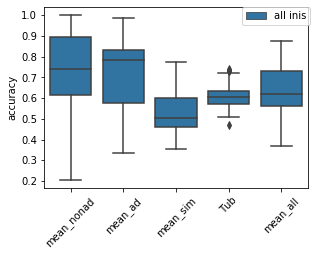

In [335]:
file = "pipeline_initStrat_v2.eps"
orde = ["mean_nonad", "mean_ad","mean_sim","Tub","mean_all"]
ax1 = sns.boxplot(x="type", hue="initStrat",y="value", data=tabAcc_long.loc[bool_tot], order=orde)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
new_labels = ['all inis', 'target & mani','target','mani']
for t, l in zip(ax1.get_legend().texts, new_labels):
    t.set_text(l)
ax1.set_xlabel('')
ax1.set_ylabel('accuracy')
plt.gcf().subplots_adjust(bottom=0.25, right=0.735)
plt.savefig(repos+file, format='eps', dpi=300, pad_inches=0.3)

2022-02-25 09:54:24,274:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:54:24,275:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


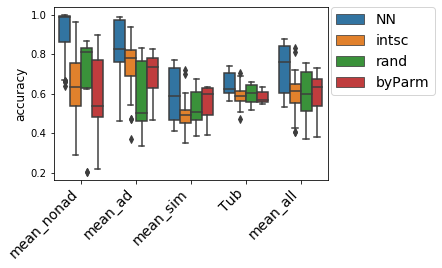

In [342]:
file = "pipeline_pairUp_v2.eps"
horde = ["NN","intsc","rand","byParm"]
ax2 = sns.boxplot(x="type", hue="pairUp",y="value", data=tabAcc_long.loc[bool_tot], order=orde, hue_order=horde)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,prop={'size': 14})
ax2.set_xlabel('')
ax2.set_ylabel('accuracy', size=12)
plt.xticks(rotation=45, ha="right", size=14)
plt.gcf().subplots_adjust(right=0.76, bottom=0.28)
plt.savefig(repos+file, format='eps', dpi=300)

2022-02-25 09:54:54,993:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:54:54,994:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


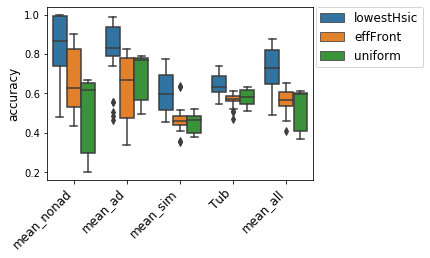

In [344]:
file = "pipeline_weight_v2.eps"
horde = ["lowestHsic","effFront","uniform"]
ax3 = sns.boxplot(x="type", hue="weight",y="value", data=tabAcc_long.loc[bool_tot], order=orde, hue_order=horde)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,prop={'size': 12})
plt.xticks(rotation=45, ha="right", size=12)
ax3.set_xlabel('')
ax3.set_ylabel('accuracy', size=12)
plt.gcf().subplots_adjust(right=0.74, bottom=0.28)
plt.savefig(repos+file, format='eps', dpi=300)

Text(0, 0.5, 'accuracy')

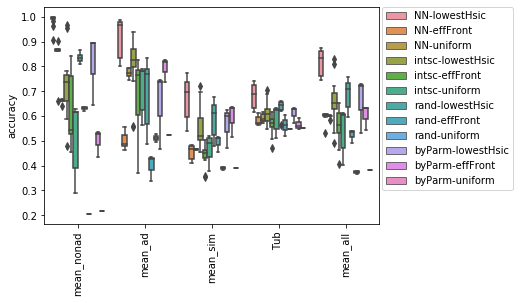

In [318]:
horde = ["NN-lowestHsic","NN-effFront","NN-uniform",
         "intsc-lowestHsic","intsc-effFront","intsc-uniform",
        "rand-lowestHsic","rand-effFront","rand-uniform",
        "byParm-lowestHsic","byParm-effFront","byParm-uniform"]
tabAcc_long["pairUp_weight"]=tabAcc_long["pairUp"]+"-"+tabAcc_long["weight"]
ax4 = sns.boxplot(x="type", hue="pairUp_weight",y="value", data=tabAcc_long.loc[bool_tot], order=orde, hue_order=horde)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax4.set_xlabel('')
ax4.set_ylabel('accuracy')

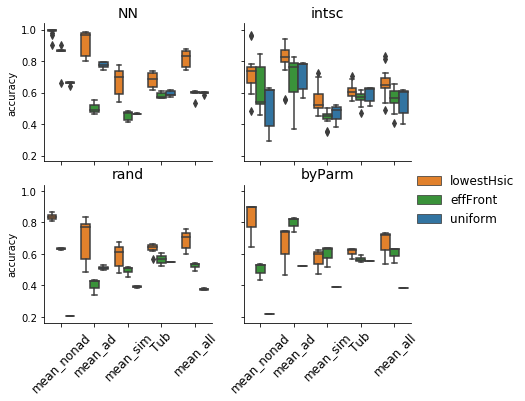

In [345]:
file = "pipeline_pairUp_weight_v2.eps"

corde = ["NN","intsc","rand","byParm"]
horde = ["lowestHsic","effFront","uniform"]
unique = tabAcc_long.loc[bool_tot]["weight"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
#palette.update({"Total":"k"})

g = sns.FacetGrid(tabAcc_long.loc[bool_tot], col="pairUp",col_wrap=2, col_order=corde)
g.map(sns.boxplot, "type", "value", "weight", order=orde, hue_order=horde, palette=palette)
g.set(xlabel='', ylabel='accuracy')
g.set_xticklabels(rotation=45, size=12)
g.add_legend(prop={'size': 12})
plt.gcf().subplots_adjust(bottom=0.25)
g.set_titles(col_template="{col_name}",size=14)
g.savefig(repos+file, format='eps', dpi=300)

## Model

In [325]:
bool_sumVars = [t in ["LS-s","Tub"] for t in tabAcc_long["type"]]
bool_model = tabAcc_long["model"]
bool_noMask = tabAcc_long["mask"]=="None"
bool_tot = [a&b&c for a,b,c in zip(bool_sumVars, bool_model, bool_noMask)]
onp.sum(bool_tot)

50

2022-02-25 09:31:23,165:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:31:23,165:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


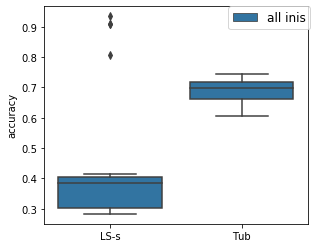

In [326]:
file = "pipeline_initStrat_mod_v2.eps"
ax1 = sns.boxplot(x="type", hue="initStrat",y="value", data=tabAcc_long.loc[bool_tot])
#plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,prop={'size': 12})
new_labels = ['all inis', 'target & mani','target','mani']
for t, l in zip(ax1.get_legend().texts, new_labels):
    t.set_text(l)
ax1.set_xlabel('')
ax1.set_ylabel('accuracy')
plt.gcf().subplots_adjust(right=0.735)
plt.savefig(repos+file, format='eps', dpi=300, pad_inches=0.3)


2022-02-25 09:31:25,263:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:31:25,263:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


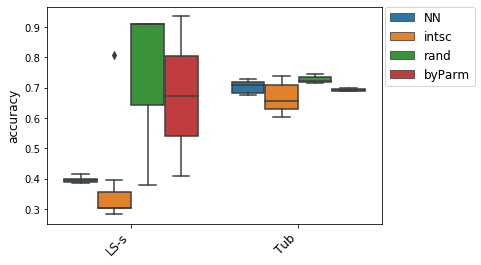

In [327]:
file = "pipeline_pairUp_mod_v2.eps"
horde = ["NN","intsc","rand","byParm"]
ax2 = sns.boxplot(x="type", hue="pairUp",y="value", data=tabAcc_long.loc[bool_tot], hue_order=horde)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,prop={'size': 12})
plt.xticks(rotation=45, ha="right", size=12)
ax2.set_xlabel('')
ax2.set_ylabel('accuracy', size=12)
plt.savefig(repos+file, format='eps', dpi=300)

2022-02-25 09:31:28,313:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 09:31:28,314:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


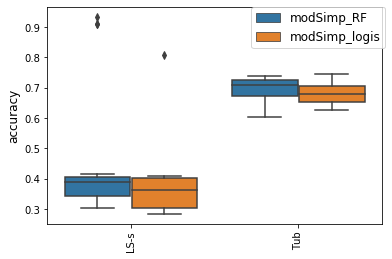

In [328]:
file = "pipeline_weight_mod_v2.eps"
horde = ["modSimp_RF","modSimp_logis"]
ax3 = sns.boxplot(x="type", hue="weight",y="value", data=tabAcc_long.loc[bool_tot], hue_order=horde)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,prop={'size': 12})
#new_labels = ['RF', 'logis']
#for t, l in zip(ax3.get_legend().texts, new_labels):
#    t.set_text(l)
ax3.set_xlabel('')
ax3.set_ylabel('accuracy',size=12)
plt.savefig(repos+file, format='eps', dpi=300)

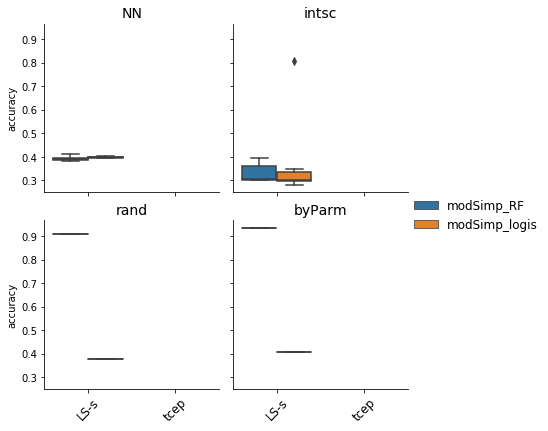

In [324]:
file = "pipeline_pairUp_weight_mod_v2.eps"
orde = ["LS-s","tcep"]
corde = ["NN","intsc","rand","byParm"]
horde = ["modSimp_RF","modSimp_logis"]
unique = tabAcc_long.loc[bool_tot]["weight"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
#palette.update({"Total":"k"})

g = sns.FacetGrid(tabAcc_long.loc[bool_tot], col="pairUp",col_wrap=2, col_order=corde)
g.map(sns.boxplot, "type", "value", "weight", order=orde, hue_order=horde, palette=palette)
g.set(xlabel='', ylabel='accuracy')
g.set_xticklabels(rotation=45, size=12)
g.add_legend(prop={'size': 12})
#plt.gcf().subplots_adjust(bottom=0.25)
g.set_titles(col_template="{col_name}",size=14)
g.savefig(repos+file, format='eps', dpi=300)


